In [621]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans

In [622]:
# import dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datamining/main/property.csv"
df = pd.read_csv(url, delimiter=";")
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Below Standard,Setro Baru Utara,"30,00","60,00",2.0,1.0,2,287799000,Belum,NaN,Standard,< 1 Mobil
1,Standard,Kenjeran,"170,00","170,00",5.0,4.0,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
2,Sangat Premium,Kenjeran,"187,00","250,00",5.0,5.0,2,3100000000,Belum,Utara,Standard,1-2 Mobil
3,Premium,Kenjeran,"350,00","600,00",5.0,5.0,2,5000000000,Belum,Barat,Standard,1-2 Mobil
4,Premium,Kenjeran,"450,00","530,00",5.0,6.0,2,10800000000,Belum,NaN,Standard,1-2 Mobil


In [623]:
# info df jumlah kolom dll
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area Category                  307 non-null    object 
 1   Nama Daerah                    307 non-null    object 
 2   Luas Tanah (m2)                307 non-null    object 
 3   Luas Bangunan (m2)             307 non-null    object 
 4   Jumlah Kamar                   307 non-null    float64
 5   Jumlah Kamar Mandi             306 non-null    float64
 6   Tingkat/Lantai                 306 non-null    object 
 7   Harga Penawaran (dari Owner)   307 non-null    object 
 8   Terjual/Belum                  307 non-null    object 
 9   Arah Hadap Rumah               225 non-null    object 
 10  Posisi Rumah                   192 non-null    object 
 11  Lebar Jalan Depan Rumah (ROW)  266 non-null    object 
dtypes: float64(2), object(10)
memory usage: 29.0+ KB


In [624]:
# cek missing value
df.isnull().sum()

Area Category                      1
Nama Daerah                        1
Luas Tanah (m2)                    1
Luas Bangunan (m2)                 1
Jumlah Kamar                       1
Jumlah Kamar Mandi                 2
Tingkat/Lantai                     2
Harga Penawaran (dari Owner)       1
Terjual/Belum                      1
Arah Hadap Rumah                  83
Posisi Rumah                     116
Lebar Jalan Depan Rumah (ROW)     42
dtype: int64

In [625]:
# drop arah dan posisi karena terlalu banyak null
df = df.drop(['Arah Hadap Rumah', 'Posisi Rumah'], axis=1)
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Lebar Jalan Depan Rumah (ROW)
0,Below Standard,Setro Baru Utara,"30,00","60,00",2.0,1.0,2,287799000,Belum,< 1 Mobil
1,Standard,Kenjeran,"170,00","170,00",5.0,4.0,2,2699999999,Belum,1-2 Mobil
2,Sangat Premium,Kenjeran,"187,00","250,00",5.0,5.0,2,3100000000,Belum,1-2 Mobil
3,Premium,Kenjeran,"350,00","600,00",5.0,5.0,2,5000000000,Belum,1-2 Mobil
4,Premium,Kenjeran,"450,00","530,00",5.0,6.0,2,10800000000,Belum,1-2 Mobil


In [626]:
from sklearn.impute import SimpleImputer

# memgisi null dengan most frequent
imputer = SimpleImputer(strategy='most_frequent')
df.iloc[:,:] = imputer.fit_transform(df)
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Lebar Jalan Depan Rumah (ROW)
0,Below Standard,Setro Baru Utara,"30,00","60,00",2.0,1.0,2,287799000,Belum,< 1 Mobil
1,Standard,Kenjeran,"170,00","170,00",5.0,4.0,2,2699999999,Belum,1-2 Mobil
2,Sangat Premium,Kenjeran,"187,00","250,00",5.0,5.0,2,3100000000,Belum,1-2 Mobil
3,Premium,Kenjeran,"350,00","600,00",5.0,5.0,2,5000000000,Belum,1-2 Mobil
4,Premium,Kenjeran,"450,00","530,00",5.0,6.0,2,10800000000,Belum,1-2 Mobil


In [627]:
df.columns

Index(['Area Category', 'Nama Daerah', 'Luas Tanah (m2)', 'Luas Bangunan (m2)',
       'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Tingkat/Lantai ',
       'Harga Penawaran (dari Owner)', 'Terjual/Belum',
       'Lebar Jalan Depan Rumah (ROW)'],
      dtype='object')

In [628]:
df.sample(n=5)

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Lebar Jalan Depan Rumah (ROW)
108,Premium,Sutorejo Timur,90,145,4.0,4.0,2,1990000000,Belum,1-2 Mobil
28,Premium,Gubeng,"204,00","270,00",5.0,4.0,2,4700000000,Belum,> 2 Mobil
240,Premium,Gading,100,120,4.0,4.0,2,1800000000,Belum,> 2 Mobil
106,Standard,Sutorejo Utara,157,362,7.0,3.0,2,1950000000,Belum,1-2 Mobil
199,Premium,Rungkut,120,140,4.0,2.0,2,1600000000,Belum,1-2 Mobil


In [629]:
# menghapus harga yg kosong
df.drop(df[df['Harga Penawaran (dari Owner)'] == ""].index, inplace = True)
df.drop(df[df['Harga Penawaran (dari Owner)'] == " "].index, inplace = True)

In [630]:
# value supaya konsisten dan bersih
df['Luas Tanah (m2)'] = df['Luas Tanah (m2)'].str.replace(',','.')
df['Luas Bangunan (m2)'] = df['Luas Bangunan (m2)'].str.replace(',','')
df['Luas Bangunan (m2)'] = df['Luas Bangunan (m2)'].str.replace(' ','')
df['Luas Bangunan (m2)'] = df['Luas Bangunan (m2)'].str.replace('.','')
df['Tingkat/Lantai '] = df['Tingkat/Lantai '].str[:1]
df['Harga Penawaran (dari Owner)'] = df['Harga Penawaran (dari Owner)'].str.replace('.','')
df['Harga Penawaran (dari Owner)'] = df['Harga Penawaran (dari Owner)'].str.replace(',','')
df['Harga Penawaran (dari Owner)'] = df['Harga Penawaran (dari Owner)'].str.replace(' ','')

<ipython-input-630-1ba03f76b136>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Luas Bangunan (m2)'] = df['Luas Bangunan (m2)'].str.replace('.','')
<ipython-input-630-1ba03f76b136>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Harga Penawaran (dari Owner)'] = df['Harga Penawaran (dari Owner)'].str.replace('.','')


In [631]:
# info df jumlah kolom dll
df.rename(columns = {'Tingkat/Lantai ':'Tingkat'}, inplace = True)
df.rename(columns = {'Terjual/Belum':'Terjual'}, inplace = True)
df = df.astype({"Jumlah Kamar":'int64', "Jumlah Kamar Mandi":'int64', "Tingkat":'int64', "Luas Tanah (m2)":'float64', "Luas Bangunan (m2)":'float64', "Harga Penawaran (dari Owner)": 'int64'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307 entries, 0 to 307
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area Category                  307 non-null    object 
 1   Nama Daerah                    307 non-null    object 
 2   Luas Tanah (m2)                307 non-null    float64
 3   Luas Bangunan (m2)             307 non-null    float64
 4   Jumlah Kamar                   307 non-null    int64  
 5   Jumlah Kamar Mandi             307 non-null    int64  
 6   Tingkat                        307 non-null    int64  
 7   Harga Penawaran (dari Owner)   307 non-null    int64  
 8   Terjual                        307 non-null    object 
 9   Lebar Jalan Depan Rumah (ROW)  307 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 26.4+ KB


In [632]:
# melihat macam nama daerah
df['Nama Daerah'].unique()

# drop karena terlalu banyak semacam id
df = df.drop('Nama Daerah', axis=1)
df.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat,Harga Penawaran (dari Owner),Terjual,Lebar Jalan Depan Rumah (ROW)
0,Below Standard,30.0,6000.0,2,1,2,287799000,Belum,< 1 Mobil
1,Standard,170.0,17000.0,5,4,2,2699999999,Belum,1-2 Mobil
2,Sangat Premium,187.0,25000.0,5,5,2,3100000000,Belum,1-2 Mobil
3,Premium,350.0,60000.0,5,5,2,5000000000,Belum,1-2 Mobil
4,Premium,450.0,53000.0,5,6,2,10800000000,Belum,1-2 Mobil


In [633]:
# encoding map untuk kategorikal area dan lebar jalan
area_category_map = {'Below Standard': 1, 'Standard': 2, 'Premium': 3, 'Sangat Premium': 4}
df['Area Category'] = df['Area Category'].map(area_category_map)

jalan_map = {'< 1 Mobil':1, '1-2 Mobil':2, '> 2 Mobil':3}
df['Lebar Jalan Depan Rumah (ROW)'] = df['Lebar Jalan Depan Rumah (ROW)'].map(jalan_map)

# encoding label encoder untuk terjual/belum
le = LabelEncoder()
df['Terjual'] = le.fit_transform(df['Terjual'])

df.sample(n = 5)

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat,Harga Penawaran (dari Owner),Terjual,Lebar Jalan Depan Rumah (ROW)
221,2,240.0,350.0,5,4,3,5750000000,0,2
128,2,362.0,250.0,4,4,2,3700000000,0,3
112,2,96.0,136.0,3,3,2,2250000000,0,3
229,2,200.0,344.0,6,4,2,3000000000,0,2
284,3,320.0,283.0,4,5,2,6400000000,0,3


In [634]:
df.describe()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat,Harga Penawaran (dari Owner),Terjual,Lebar Jalan Depan Rumah (ROW)
count,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,3.070000e+02,307.0,307.000000
mean,2.397394,227.104235,3845.283388,4.273616,3.332248,1.840391,8.382426e+09,0.0,2.328990
std,0.803420,202.133075,11388.559689,1.645966,1.627090,0.508680,6.021909e+10,0.0,0.553574
min,1.000000,14.000000,16.000000,1.000000,1.000000,1.000000,1.600000e+08,0.0,1.000000
25%,2.000000,96.000000,140.000000,3.000000,2.000000,2.000000,1.400000e+09,0.0,2.000000
50%,2.000000,162.000000,250.000000,4.000000,3.000000,2.000000,2.699000e+09,0.0,2.000000
75%,3.000000,286.000000,560.000000,5.000000,4.000000,2.000000,4.888889e+09,0.0,3.000000
max,4.000000,1561.000000,100000.000000,13.000000,13.000000,4.000000,1.050000e+12,0.0,3.000000


In [635]:
df.isin(['']).any()

Area Category                    False
Luas Tanah (m2)                  False
Luas Bangunan (m2)               False
Jumlah Kamar                     False
Jumlah Kamar Mandi               False
Tingkat                          False
Harga Penawaran (dari Owner)     False
Terjual                          False
Lebar Jalan Depan Rumah (ROW)    False
dtype: bool

In [636]:
# scaling
sc = StandardScaler()
df2 = sc.fit_transform(df)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


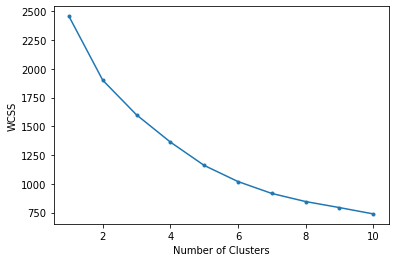

In [637]:
ssquares = []
for i in range(1,11) :
  km = KMeans(n_clusters=i, max_iter=500, random_state=32)
  km.fit(df2)
  ssquares.append(km.inertia_)
plt.plot(range(1,11), ssquares, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [638]:
# install kneed library

!pip install kneed

In [639]:
# using kneelocator to find the elbow/knee

from kneed import KneeLocator

findknee = KneeLocator(range(1,11), ssquares, curve="convex", direction="decreasing")
print("the best k for your model is ",findknee.elbow)

the best k for your model is  5


In [640]:
km_model = KMeans(n_clusters = findknee.elbow, random_state=1)
y_kmeans = km_model.fit_predict(df2)
y_kmeans

array([4, 0, 3, 3, 3, 4, 0, 4, 4, 4, 4, 0, 0, 0, 0, 4, 0, 0, 4, 4, 0, 0,
       0, 4, 3, 0, 0, 3, 3, 0, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 0, 4, 0, 0, 4, 4, 0, 4, 4, 4,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 4, 0, 0, 4, 0, 0, 4, 2, 0, 4, 4,
       0, 0, 0, 0, 4, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 4, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 4, 0, 0,
       0, 2, 4, 0, 2, 0, 0, 4, 4, 0, 4, 0, 0, 4, 4, 4, 2, 4, 4, 2, 2, 0,
       0, 0, 4, 0, 4, 0, 0, 0, 4, 4, 4, 4, 2, 4, 4, 4, 0, 2, 4, 0, 0, 4,
       0, 0, 4, 4, 0, 4, 0, 1, 0, 4, 4, 0, 0, 4, 4, 4, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 2, 0, 0, 4, 4, 0, 4, 0, 0, 0, 2, 4, 2, 0, 0, 4,
       4, 2, 0, 4, 2, 2, 4, 4, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 4, 4, 0, 0,
       0, 0, 2, 2, 2, 0, 4, 2, 0, 4, 4, 2, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 4, 0, 2, 0, 2, 4, 0, 0,

In [656]:
df['K means'] = y_kmeans
df.groupby('K means').agg(Area_Category = ('Area Category', pd.Series.mode), Luas_Tanah = ('Luas Tanah (m2)', 'mean'), Luas_Bangunan = ('Luas Bangunan (m2)', 'mean'), Jumlah_Kamar = ('Jumlah Kamar', pd.Series.mode), Jumlah_Kamar_Mandi = ('Jumlah Kamar Mandi', pd.Series.mode), Tingkat = ('Tingkat', pd.Series.mode), Terjual = ('Terjual', pd.Series.mode), Harga_Owner = ('Harga Penawaran (dari Owner)', 'mean'), ROW = ('Lebar Jalan Depan Rumah (ROW)', pd.Series.mode), Count = ('K means', pd.Series.count))

,Area_Category,Luas_Tanah,Luas_Bangunan,Jumlah_Kamar,Jumlah_Kamar_Mandi,Tingkat,Terjual,Harga_Owner,ROW,Count
K means,,,,,,,,,,
0,3,170.369427,1827.439490,4,4,2,0,3.335048e+09,2,157
1,4,360.000000,500.000000,5,5,2,0,1.050000e+12,2,1
2,4,562.382979,600.340426,5,5,2,0,1.402904e+10,3,47
3,3,349.733333,45740.000000,5,"[3, 4, 5]",2,0,1.377000e+10,2,15
4,2,125.689655,2054.919540,2,"[1, 2]",1,0,1.538934e+09,2,87


<function matplotlib.pyplot.show(close=None, block=None)>

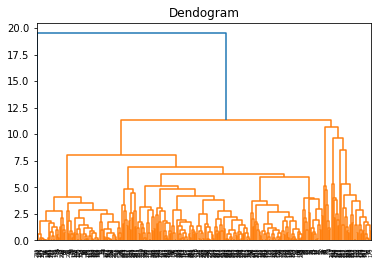

In [644]:
dist_matrix = sch.linkage(df2, method='complete')
dn = sch.dendrogram(dist_matrix)
plt.title('Dendogram')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

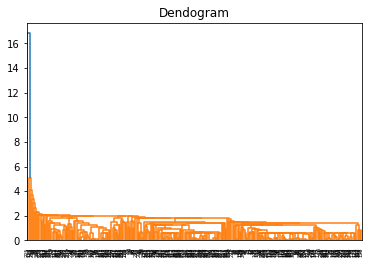

In [647]:
dist_matrix = sch.linkage(df2, method='single')
dn = sch.dendrogram(dist_matrix)
plt.title('Dendogram')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

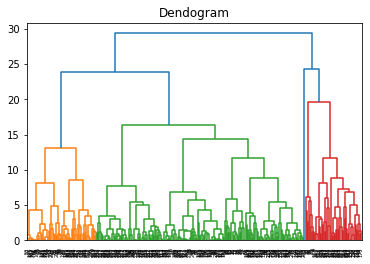

In [648]:
dist_matrix = sch.linkage(df2, method='ward')
dn = sch.dendrogram(dist_matrix)
plt.title('Dendogram')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

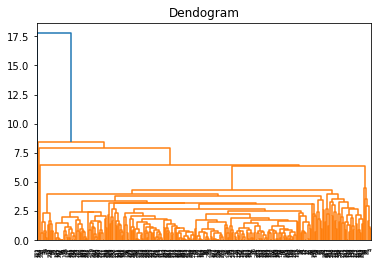

In [649]:
dist_matrix = sch.linkage(df2, method='average')
dn = sch.dendrogram(dist_matrix)
plt.title('Dendogram')
plt.show

In [652]:
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean')
y_hc = hc.fit_predict(df2)
y_hc

array([1, 0, 0, 4, 4, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 4, 0, 0, 4, 0, 0, 4, 0, 3, 4, 4, 4, 4, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 1, 0, 3, 3, 3, 1, 0, 0,
       0, 3, 0, 0, 3, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 3, 1, 0, 3, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 3, 1, 1, 1, 0, 3, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 3, 0, 0, 1, 3, 3, 0, 3, 0, 0,
       0, 3, 0, 3, 3, 3, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 3, 1, 3, 0, 3, 1,
       1, 3, 0, 1, 3, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 3, 3, 0, 0, 3, 0, 1, 0, 3, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       3, 0, 0, 3, 0, 0, 1, 0, 0, 3, 0, 3, 1, 0, 0,

In [653]:
df["Hierarchical Cluster"] = y_hc
df.groupby('Hierarchical Cluster').agg(Area_Category = ('Area Category', pd.Series.mode), Luas_Tanah = ('Luas Tanah (m2)', 'mean'), Luas_Bangunan = ('Luas Bangunan (m2)', 'mean'), Jumlah_Kamar = ('Jumlah Kamar', pd.Series.mode), Jumlah_Kamar_Mandi = ('Jumlah Kamar Mandi', pd.Series.mode), Tingkat = ('Tingkat', pd.Series.mode), Terjual = ('Terjual', pd.Series.mode), Harga_Owner = ('Harga Penawaran (dari Owner)', 'mean'), ROW = ('Lebar Jalan Depan Rumah (ROW)', pd.Series.mode), Count = ('Hierarchical Cluster', 'count'))

,Area_Category,Luas_Tanah,Luas_Bangunan,Jumlah_Kamar,Jumlah_Kamar_Mandi,Tingkat,Terjual,Harga_Owner,ROW,Count
Hierarchical Cluster,,,,,,,,,,
0,2,160.384211,2918.631579,4,4,2,0,2.950048e+09,2,190
1,2,154.968750,1563.781250,2,1,1,0,2.256809e+09,2,64
2,4,360.000000,500.000000,5,5,2,0,1.050000e+12,2,1
3,4,584.906977,611.162791,6,5,2,0,1.494558e+10,3,43
4,2,424.333333,55455.555556,"[5, 7]",5,2,0,1.953333e+10,2,9
